IRIS

In [1]:
import pandas as pd
df=pd.read_csv(r"iris.csv")
df.head()



,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [2]:
df.replace({'setosa':0,'versicolor':1,'virginica':2},inplace=True)

x=df.iloc[:,:-1]


y=df.iloc[:,-1]

C:\Users\hanal\AppData\Local\Temp\ipykernel_18180\1597504167.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({'setosa':0,'versicolor':1,'virginica':2},inplace=True)


In [3]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [4]:
from sklearn.model_selection import train_test_split as tt
xtr,xte,ytr,yte = tt(x,y,test_size=20)

In [5]:
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB as gn
import numpy as np
from scipy.stats import mode
from sklearn.metrics import accuracy_score as ac
from sklearn.utils import resample
import matplotlib.pyplot as plt


In [6]:



def bias_variance(xtr,xte,ytr,yte,model):
    prediction=[]
    for i in range(10):
        xboot , yboot = resample(xtr,ytr,replace = True)
        model.fit(xboot,yboot)
        yp=model.predict(xte)
        prediction.append(yp)

    pred=np.array(prediction,dtype=int)
    fpred,_=mode(pred, axis=0,keepdims=False)
    bias=1-ac(yte,fpred)

    var=np.mean([np.mean(i!=fpred) for i in pred ] )
    return bias,var

In [15]:
svc=SVC()
bias1,var1=bias_variance(xtr,xte,ytr,yte,svc)
print("For SVM : ")
print("Bias : ",bias1)
print("Variance : ",var1)

For SVM : 
Bias :  0.0
Variance :  0.04


In [16]:
bayes=gn()
bias2,var2=bias_variance(xtr,xte,ytr,yte,svc)
print("For NAIVE_BAYES : ")
print("Bias : ",bias2)
print("Variance : ",var2)

For NAIVE_BAYES : 
Bias :  0.09999999999999998
Variance :  0.030000000000000006


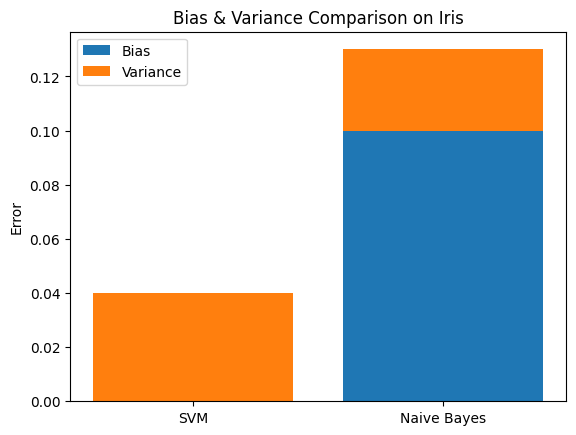

In [17]:

models = ["SVM", "Naive Bayes"]
bias_values = [bias1, bias2]       
variance_values = [var1, var2]

x = range(len(models))
plt.bar(x, bias_values, label="Bias")
plt.bar(x, variance_values, bottom=bias_values, label="Variance")
plt.xticks(x, models)
plt.ylabel("Error")
plt.title("Bias & Variance Comparison on Iris")
plt.legend()
plt.show()


DIABETES

In [37]:
import pandas as pd
from sklearn.svm import SVR

In [38]:
from sklearn.datasets import load_diabetes
d=load_diabetes()
df = pd.DataFrame(d.data, columns=d.feature_names)

df['target'] = d.target
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


In [39]:

x=df.iloc[:,:-1]


y=df.iloc[:,-1]
from sklearn.model_selection import train_test_split as tt
xtr,xte,ytr,yte = tt(x,y,test_size=20)

In [40]:



def bias_variance(xtr,xte,ytr,yte,model):
    prediction=[]
    for i in range(10):
        xboot , yboot = resample(xtr,ytr,replace = True)
        model.fit(xboot,yboot)
        yp=model.predict(xte)
        prediction.append(yp)

    pred=np.array(prediction,dtype=int)
    pmean=np.mean(pred, axis=0,keepdims=False)
    bias=np.mean((pmean-yte)**2)
    

    var=np.mean(np.var(pred,axis=0))
    return bias,var

In [45]:
svr=SVR()
bias2,var=bias_variance(xtr,xte,ytr,yte,svr)
error=bias2+var
print("Bias : ",np.sqrt(bias2))
print("Variance : ",var)
print("Error : ",error)

Bias :  68.92283003475698
Variance :  18.3685
Error :  4768.724999999999


In [43]:

# metrics = ['Bias', 'Variance']
# values = [np.sqrt(bias2), var]

# plt.bar(metrics, values, color=['red', 'blue'])
# plt.ylabel("Error Value")

# plt.show()


In [49]:
# C_values = [0.01, 0.1, 1, 10, 100]
# bias_list, var_list, total_error = [], [], []
# svr=SVR()
# for C in C_values:
#     svr = SVR(kernel='rbf', C=C)
#     bias, variance = bias_variance(xtr, xte, ytr, yte, svr)
#     bias_list.append(bias)
#     var_list.append(variance)
#     total_error.append(bias**2 + variance)  # Total error

# # ✅ Plot Tradeoff
# plt.figure(figsize=(8,5))
# plt.plot(C_values, bias_list, 'ro-', label="Bias")
# plt.plot(C_values, var_list, 'bo-', label="Variance")
# plt.plot(C_values, total_error, 'go-', label="Total Error")

# plt.xscale('log')  # log scale for C
# plt.xlabel("Model Complexity (C parameter)")
# plt.ylabel("Error")
# plt.title("Bias–Variance Tradeoff (SVR on Diabetes Regression)")
# plt.legend()
# plt.grid(True)
# plt.show()

In [48]:
# fig, ax1 = plt.subplots()

# ax1.set_xscale('log')
# ax1.plot(C_values, bias_list, 'ro-', label="Bias")
# ax1.plot(C_values, var_list, 'bo-', label="Variance")
# ax1.set_ylabel("Bias / Variance")

# ax2 = ax1.twinx()
# ax2.plot(C_values, total_error, 'go-', label="Total Error")
# ax2.set_ylabel("Total Error")

# plt.xlabel("Model Complexity (C)")
# plt.title("Bias-Variance Tradeoff")
# plt.show()


TITANIC

In [29]:
df=pd.read_csv(r"Titanic-Dataset.csv")
df = df.fillna(df.median(numeric_only=True))
df["Sex"] = df["Sex"].map({"male": 0, "female": 1})
df["Embarked"] = df["Embarked"].map({"C": 0, "Q": 1, "S": 2})
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,2.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,0.0
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,2.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,2.0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,2.0


In [30]:


# df = df.fillna(df.median(numeric_only=True))


In [31]:

x = df.drop(df.columns[1], axis=1) 
x = x.drop(["PassengerId", "Name", "Ticket", "Cabin"], axis=1)
y=df['Survived']
from sklearn.model_selection import train_test_split as tt
xtr,xte,ytr,yte = tt(x,y,test_size=20)

In [32]:

from sklearn.impute import SimpleImputer
def bias_variance(xtr, xte, ytr, yte, model, n_bootstrap=10):

    if isinstance(xtr, pd.Series):
        xtr = xtr.to_frame()
    if isinstance(xte, pd.Series):
        xte = xte.to_frame()
    imputer = SimpleImputer(strategy='mean')
    all_preds = []
    
    for i in range(n_bootstrap):
     
        xboot, yboot = resample(xtr, ytr, replace=True)
        boot_df = pd.concat([xboot, yboot], axis=1).dropna(how="all")
        xboot = boot_df.iloc[:, :-1]
        yboot = boot_df.iloc[:, -1]
        xboot_imp = imputer.fit_transform(xboot)
        xte_imp   = imputer.transform(xte) 
        model.fit(xboot_imp, yboot)
        y_pred = model.predict(xte_imp)
        all_preds.append(y_pred)
    all_preds = np.array(all_preds)
    avg_preds = np.mean(all_preds, axis=0)
    bias = np.mean((avg_preds - yte.values) ** 2)
    variance = np.mean(np.var(all_preds, axis=0))
    
    return bias, variance

In [33]:
svc=SVC()
bias1,var1=bias_variance(xtr,xte,ytr,yte,svc)
print("For SVM : ")
print("Bias : ",bias1)
print("Variance : ",var1)

For SVM : 
Bias :  0.43900000000000006
Variance :  0.041


In [39]:
bayes=gn()
bias2,var2=bias_variance(xtr,xte,ytr,yte,bayes)
print("For NAIVE_BAYES : ")
print("Bias : ",bias2)
print("Variance : ",var2)

For NAIVE_BAYES : 
Bias :  0.308
Variance :  0.012000000000000002


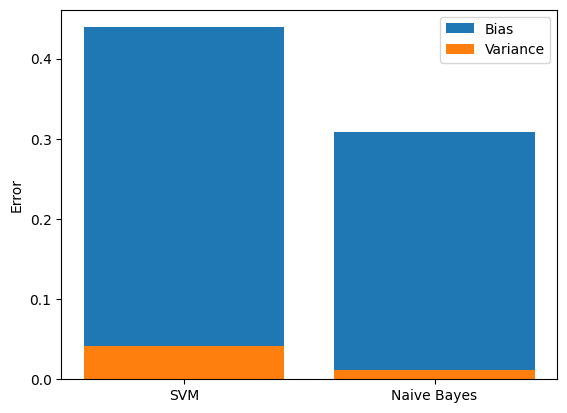

In [42]:

models = ["SVM", "Naive Bayes"]
bias_values = [bias1, bias2]      
variance_values = [var1,var2]

x = range(len(models))
plt.bar(x, bias_values, label="Bias")
plt.bar(x, variance_values,  label="Variance")
plt.xticks(x, models)
plt.ylabel("Error")

plt.legend()
plt.show()
